# Professional DATA ANALYSIS NANODEGREE

# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Overview

 This is the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from    The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.

**This database contains the following features:-**

+ id - This is infact the movie_id as in the first dataset.
+ imdb_id - A unique identifier for each movie on IMDB.
+ popularity - A numeric quantity specifying the movie popularity.
+ budget - The budget in which the movie was made.
+ revenue - The worldwide revenue generated by the movie.
+ original_title - The title of the movie before translation or adaptation.
+ cast - The name of lead and supporting actors.
+ homepage - A link to the homepage of the movie.
+ director - the director of the movie.
+ tagline - Movie's tagline.
+ keywords - The keywords or tags related to the movie.
+ overview - A brief description of the movie.
+ runtime - The running time of the movie in minutes.
+ genre - The genre of the movie, Action, Comedy ,Thriller etc.
+ production_companies - The production house of the movie.
+ release_date - The date on which it was released.
+ vote_count - The Number of people who vote for each Movie
+ vote_average - average ratings the movie recieved.
+ release_year - The Year on which it was released.
+ budget_adj - shows the budget associated movie in terms of 2010 dollars.
+ revenue_adj - shows the revenue associated movie in terms of 2010 dollars.

**Dataset Contain:**
+ Total Rows = 10866
+ Total Columns = 21

**Question that can analyised from this data set:**
1. Overview Discussion of The Production Development in the Number of Movies Annually.
2. Which Movies have the Highest Profit, Revenue, Budget, and Popularity?
3. Who are The Top 5 Directors from 2000 to 2015 based on Vote Average?.
4. Which genres are most produced over the dataset?


In [1]:
# Import The importnat Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading The Data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Number of samples

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are 10866 columns and 21 rows, Let's list that we'll do with this dataset:

## Data Cleaning:

 1. Drop unused Columns like, ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'tagline', 'keywords', 'overview'].
 2. Drop Duplicates Rows
 3. Drop Rows with any null values.
 4. Change the 'release data' column from object which is string to datatime.
 5. Drop all Rows that have zero value.


In [6]:
# Drop unnecessary columns
df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
# print number of duplicates in datasets
df.duplicated().sum()

1

In [9]:
# Drop duplicates in dataset
df.drop_duplicates(inplace=True)

In [10]:
# view missing value count for each properties
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [11]:
# drop rows with any null values in dataset 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


In [12]:
# change the 'release data' column from object which is string to datatime.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [13]:
# Checking if the dataset contains runtime of zero or less than zero
runtime_zero = df['runtime'] == 0
df[runtime_zero].shape , df[runtime_zero].index.values

((13, 13),
 array([  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], dtype=int64))

In [14]:
df[runtime_zero]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015
486,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015
1289,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014
1293,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014
3329,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,0,Family,Filmauro,2008-03-07,35,5.3,2008
3857,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,0,Horror,Access Motion Pictures,2011-06-10,13,5.2,2011
4944,0.026459,0,0,How to Fall in Love,Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...,Mark Griffiths,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,2012-07-21,11,4.7,2012
5695,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,Devin McGinn,0,Thriller|Horror|Science Fiction,DeepStudios,2013-10-30,27,4.3,2013


### As it's observed not only rows of runtime has zero values, budget and revenue have also so i'm going to drop all rows that have zero value

In [15]:
df.drop(labels = [92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], inplace=True)

In [16]:
# Check agin
df[runtime_zero]

C:\Users\Mahmoud\AppData\Local\Temp/ipykernel_11548/3717262153.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[runtime_zero]


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [17]:
# Checking if the dataset contains revenue of zero or less than zero
revenue_zero = df['revenue'] == 0
df[revenue_zero].shape , df[revenue_zero].index.values

((5009, 13),
 array([   48,    67,    74, ..., 10863, 10864, 10865], dtype=int64))

In [18]:
df[revenue_zero]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015
93,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,2015-01-16,181,4.1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966


In [19]:
# Checking if the dataset contains budget of zero or less than zero
budget_zero = df['budget'] == 0
df[budget_zero].shape , df[budget_zero].index.values

((4739, 13),
 array([   30,    36,    72, ..., 10862, 10863, 10864], dtype=int64))

**As we can see it's about 5000 rows with zero value of revenue and budget, that's huge data I can't Drop it because it related with other columns like 'original_titles', 'directors', and 'generes' if i did it will cause unaccurate results.**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9759 non-null   float64       
 1   budget                9759 non-null   int64         
 2   revenue               9759 non-null   int64         
 3   original_title        9759 non-null   object        
 4   cast                  9759 non-null   object        
 5   director              9759 non-null   object        
 6   runtime               9759 non-null   int64         
 7   genres                9759 non-null   object        
 8   production_companies  9759 non-null   object        
 9   release_date          9759 non-null   datetime64[ns]
 10  vote_count            9759 non-null   int64         
 11  vote_average          9759 non-null   float64       
 12  release_year          9759 non-null   int64         
dtypes: datetime64[ns]

In [21]:
df.shape

(9759, 13)

<a id='eda'></a>
## Exploratory Data Analysis

> It's Time To EDA.


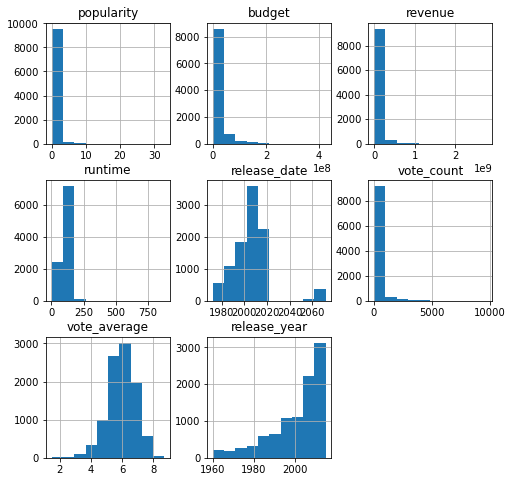

In [22]:
df.hist(figsize=(8,8));

### Q1: Overview Discussion about The Production Development in the Number of Movies Annually.

+ let's look about our Dataset Range Years

In [23]:
# calculate the min and max edge of years
df['release_year'].min(), df['release_year'].max()

(1960, 2015)

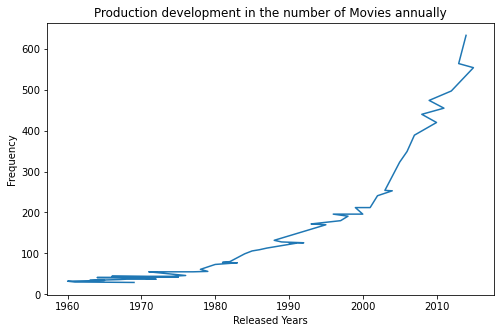

In [24]:
# visualize released movies for each 10 years from 1960 to 2015
df['release_year'].value_counts().plot(kind='line',figsize=(8,5))
plt.title('Production development in the number of Movies annually')
plt.xlabel('Released Years')
plt.ylabel('Frequency');

+ We Analysis Data of Movies Released from 1960 to 2015
+ The Number of Movies is about 10,000, Ooh I think that's a huge number and i'm Interesting!!
+ So, as we can see The Production of Movies increasing over the years. 

### Q2: Wich Movies have the Highest Profit, Revenue, Budget, and Popularity?


+ First, let's calculate the Profit for each Movie.

In [25]:
# extract the revenue from budget to get profit for each movie
df['profit'] = df['revenue'] - df['budget']

In [26]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,9759.000000,9.759000e+03,9.759000e+03,9759.000000,9759.000000,9759.000000,9759.000000,9.759000e+03
mean,0.695266,1.620089e+07,4.429013e+07,103.063736,239.597602,5.964535,2000.862793,2.808924e+07
std,1.037370,3.222692e+07,1.226599e+08,27.641529,603.361812,0.912967,13.038056,1.015068e+08
min,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,0.232931,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,1994.000000,0.000000e+00
50%,0.420185,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,0.000000e+00
75%,0.777162,1.965000e+07,3.111596e+07,112.000000,173.500000,6.600000,2011.000000,1.427639e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,2.544506e+09


#### let's find out what are the Top 10 Movies in Profit, Revenue, and Budget?

In [27]:
def top_10(col_name, size=10):
    #find the all times top 10 for a fiven column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
    #calculate the average
    avg = np.mean(df[col_name])
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.title() + '(U.S Dollar)')
    else:
        plt.xlabel(col_name.title())
    plt.ylabel('')
    plt.title('Top 10 Movies in:' + col_name.title())
    plt.legend()

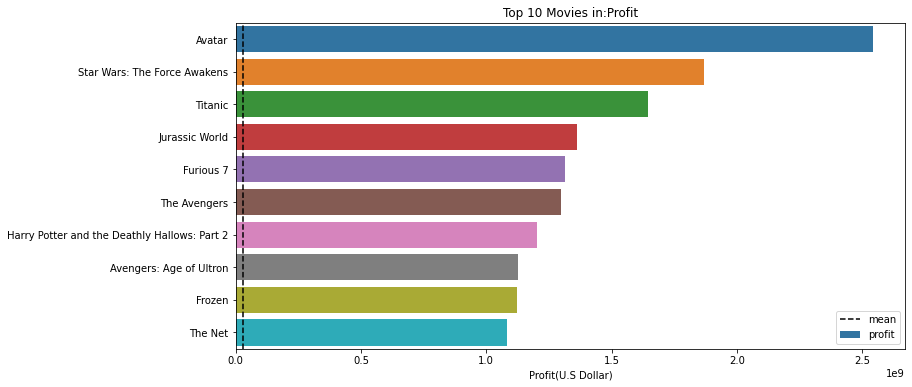

In [28]:
top_10('profit')

+ As we can see **Avatar** Movie By James Cameron has the Highest Profit by earning over 2.5B Dollar.
+ **'Avatar', 'Star Wars: The Force Awakens', 'Titanic', and 'Jurassic World'** earned the highest Profit in all Dataset.

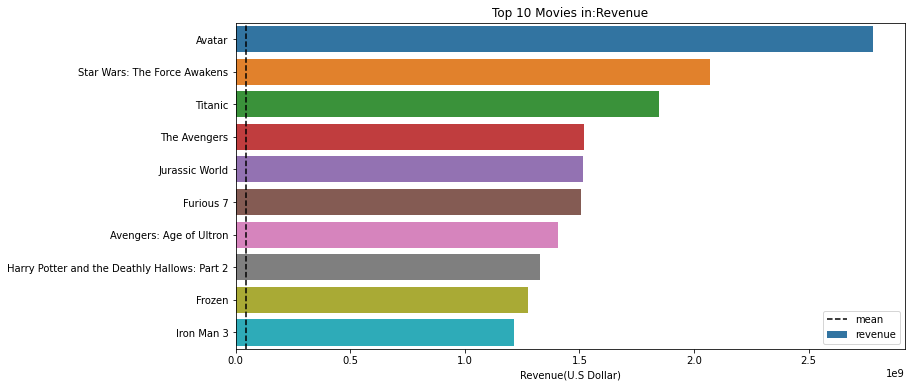

In [29]:
top_10('revenue')

+ **'Avatar', 'Star Wars: The Force Awakens', 'Titanic', and 'The Avengers'** are the Most Movies Revenue.

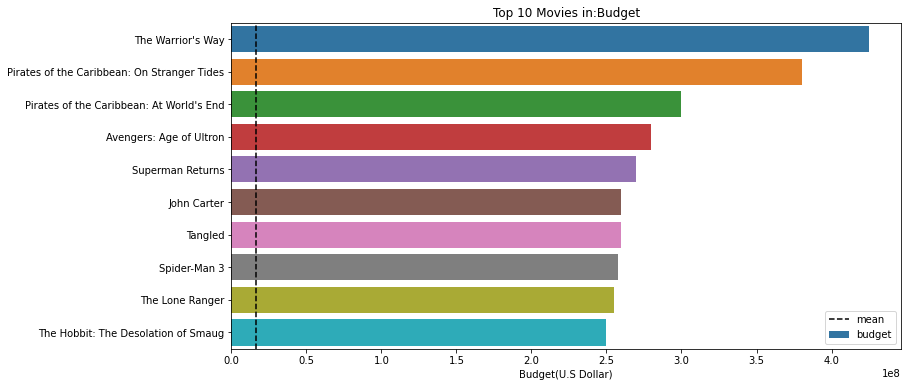

In [30]:
top_10('budget')


+ **Top 10 Movies in Badguet**, that's interesting!!

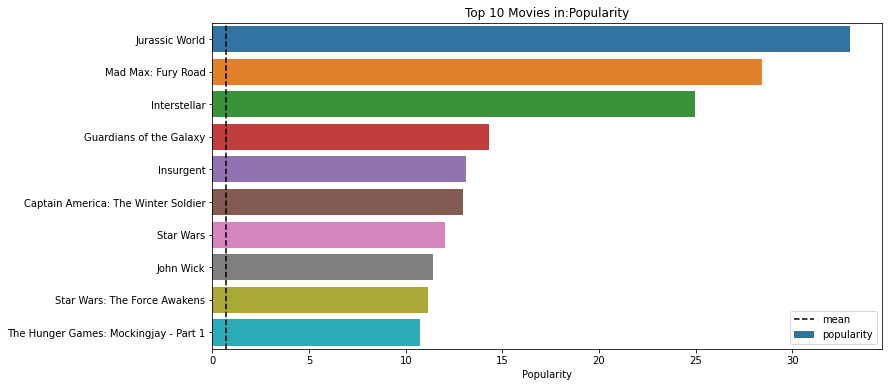

In [31]:
top_10('popularity')

+ **Jurasic World** for 'Chris Pratty' Movie has The Most Popularity in all Dataset. 

## Q3: Who are The Top 5 Directors from 2000 to 2015  based on Vote Average?

+ Let's see who is the Top Director.

In [32]:
df.loc[df['release_year'].idxmax()]

popularity                                                      32.985763
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                          2015-06-09 00:00:00
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
profit                                

In [33]:
# filltering dataset to movies released from 2010 to 2015
df_dir = df.query('release_year >= 2000')

In [34]:
# grouping df_dir by average director name ratings
director_data = df_dir.groupby('director').mean().vote_average

In [35]:
# let's take a look
director_data

director
 FrÃ©dÃ©ric Jardin            5.9
Aaron Blaise|Robert Walker    6.8
Aaron Hann|Mario Miscione     6.1
Aaron Harvey                  4.9
Aaron Katz|Martha Stephens    5.8
                             ... 
Ã‡aÄŸan Irmak                 8.2
Ã‰mile Gaudreault             5.2
Ã‰ric Besnard                 5.1
Ã‰tienne Chatiliez            5.7
Ã€lex Pastor|David Pastor     5.7
Name: vote_average, Length: 3583, dtype: float64

In [36]:
# Sorting the directors based on ratings
sort_dir = director_data.sort_values(ascending=False)

In [37]:
sort_dir.head(5)

director
David Mallet              8.7
Curt Morgan               8.5
Jorge RamÃ­rez SuÃ¡rez    8.4
Adam Curtis               8.3
Dean Wellins              8.3
Name: vote_average, dtype: float64

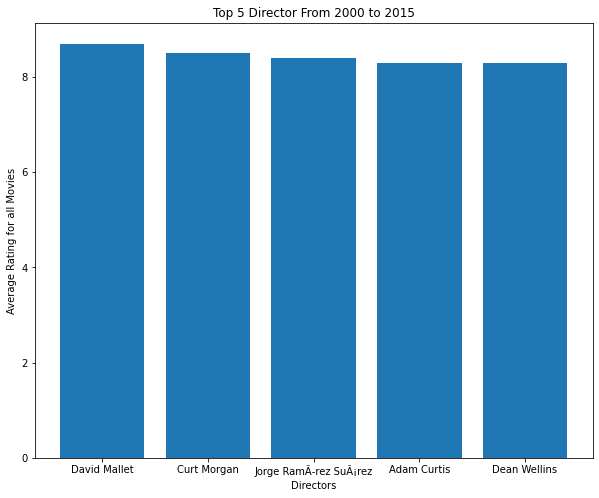

In [41]:
# visualize the data of directors to average ratings of movies
plt.subplots(figsize=(10,8))
plt.bar(sort_dir.index[:5], sort_dir[:5])
plt.title('Top 5 Director From 2000 to 2015')
plt.xlabel('Directors')
plt.ylabel('Average Rating for all Movies');

+  Amazing!! **David Mallet** is the Most Successful Director of the First FiFteen years of new Century, Following by **Curt Morgen** !!

# Q4: Which genres are most produced over the dataset?
 + extract, count, and visualize the Genres columns.

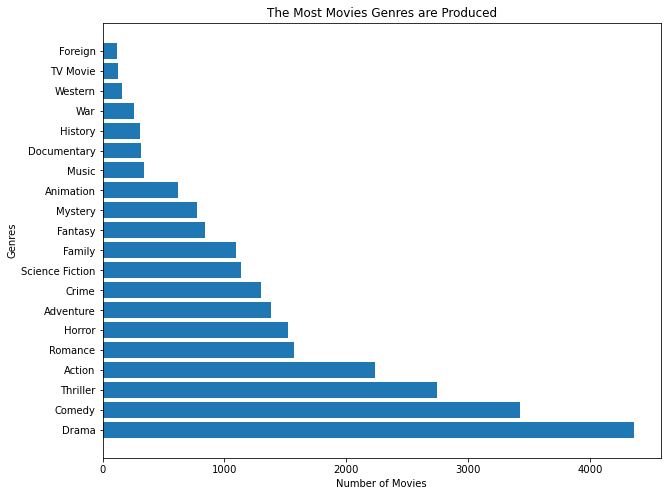

In [39]:
# extract geners columns data which seperated by '|'
data = df['genres'].str.cat(sep='|')
# storing the values in a Series
data = pd.Series(data.split('|'))
# count the frequency of each genre
count = data.value_counts(ascending=False)
# visualize the series based on values count
plt.subplots(figsize=(10,8))
plt.barh(count.index, count);
plt.title('The Most Movies Genres are Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Genres');

+ Drama, Comedy, Thriller, and Action are The Most produced Genres 

<a id='conclusions'></a>
## Conclusions

**Question 1**: We Analysis Data of Movies Released from 1960 to 2015, The Number of Movies is about 10,000, Ooh I think that's a huge number to know more about Properties and Prouducing Movies in The World, The Production of Movies increasing over the years.


**Question 2**: We disscuse the financial sides of Producing Movies depended on Profit, Budget, Revenue, and popularity.
   +  As we can see **Avatar** Movie By 'James Cameron' has the Highest *Profit* by earning over 2.5B Dollar.
   + **'Avatar', 'Star Wars: The Force Awakens', 'Titanic', and 'Jurassic World'** earned the highest *Profit* in all Dataset.
   + **'Avatar', 'Star Wars: The Force Awakens', 'Titanic', and 'The Avengers'** are the Most Movies of Revenue.
   + **'the Warrior's Way', and Two Parts of Pirates of the Caribbean: 'On Stranger Tides' an 'At World's End'** have the highest budget
   + '**Jurasic World'** for 'Chris Pratty' Movie has The Most Popularity in all the World Movies till 2015.


   
**Question 3**: By Visualize the data of directors for the first Fifteen years of New Century, we found that **David Mallet** is the Most Successful Director, Following by *Curt Morgen* and *Jorge RamÃrez SuÃ¡rez*, and here are the Top 5 Directors Ratings:
 + David Mallet              8.7
 + Curt Morgan               8.5
 + Jorge RamÃ­rez SuÃ¡rez    8.4
 + Adam Curtis               8.3
 +  Dean Wellins              8.3



**Question 4**:By extract data from geners for each movie, we found that **Drama, Comedy, Thriller, and Action** are The Most produced Genres.


**Limitations:** There were no columns about the profit of each movie but there was about the revenue and the budget of each movie so I calculated it. Here I faced various limitations. The data in the columns of Genres are sperated by '|', so I needed a function which will take any column as argument from which data is need to be extracted and keep track of count takeing a given column, and separate the string by '|' . Moreover we are not sure if the data provided to us is completel corect and up-to-date. the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. However I consider the U.S Dollar is the single currency. Dropping the rows with missing values also affected the overall analysis.

